RFBOutputContext()


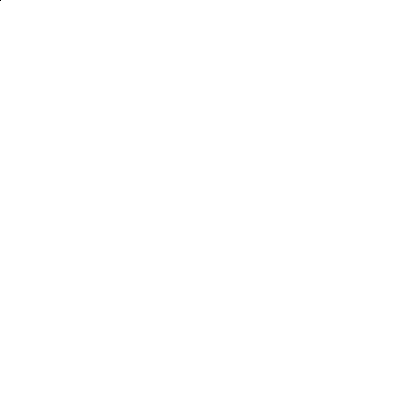

CanvasBackend(css_height='400px', css_width='400px')

In [2]:
import vispy.app
vispy.app.use_app('jupyter_rfb')
import sys

from vispy import app, gloo, scene
from vispy.visuals import CubeVisual, transforms
from vispy.visuals.transforms import STTransform

class Canvas(app.Canvas):
    def __init__(self):
        app.Canvas.__init__(self, 'Cube', keys='interactive', size=(400, 400))

        self.sphere1 = scene.visuals.Sphere(radius=1, method='latitude',
                                       edge_color='black')

        #self.sphere2 = scene.visuals.Sphere(radius=1, method='ico', 
        #                               edge_color='black')

        #self.sphere3 = scene.visuals.Sphere(radius=1, rows=10, cols=10, depth=10,
        #                               method='cube',
        #                               edge_color='black')
        self.theta = 0
        self.phi = 0

        # Create a TransformSystem that will tell the visual how to draw
        self.cube_transform = transforms.MatrixTransform()
        self.sphere1.transform = self.cube_transform
        #self.sphere2.transform = self.cube_transform
        #self.sphere3.transform = self.cube_transform

        self.timer = app.Timer('auto', connect=self.on_timer, start=True)

    def on_resize(self, event):
        # Set canvas viewport and reconfigure visual transforms to match.
        vp = (0, 0, self.physical_size[0], self.physical_size[1])
        self.context.set_viewport(*vp)
        self.sphere1.transforms.configure(canvas=self, viewport=vp)
        #self.sphere2.transforms.configure(canvas=self, viewport=vp)
        #self.sphere3.transforms.configure(canvas=self, viewport=vp)

    def on_draw(self, event):
        gloo.set_viewport(0, 0, *self.physical_size)
        gloo.clear('white', depth=True)

        self.sphere1.draw()
        #self.sphere2.draw()
        #self.sphere3.draw()

    def on_timer(self, event):
        self.theta += .5
        self.phi += .5
        #self.cube_transform.reset()
        #self.cube_transform.rotate(self.theta, (0, 0, 1))
        #self.cube_transform.rotate(self.phi, (0, 1, 0))
        #self.cube_transform.scale((100, 100, 0.001))
        #self.cube_transform.translate((200, 200))
        self.update()


win = Canvas()
#win.app.run()
win.show()
win

In [ ]:
from czml3.examples import simple
from czml3.widget import CZMLWidget
CZMLWidget(simple)